In [1]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#3 Applied Machine Learning 1\Ressources


Polyfit on the bike sharing dataset
---

Exercise: Load the dataset
---

> **Exercise**: Create the x/y **Numpy arrays**. The feature vector x should contain the temperature values. The target vector y should contain the number of users.

In [12]:
import pandas as pd
import os
import numpy as np
import numpy.polynomial.polynomial as poly
%matplotlib inline
import matplotlib.pyplot as plt


# Load the data into a Pandas DataFrame
data_df = pd.read_csv("c3_bike-sharing.csv")
data_df.head()


,temp,users
0,0.1964,120
1,0.2000,108
2,0.2270,82
3,0.2043,88
4,0.1508,41


In [20]:
# Extract the x/y Numpy arrays
x = data_df.temp
y = data_df.users

print("x:", type(x), x.shape, x.dtype, x[:5])
print("y:", type(y), y.shape, y.dtype, y[:5])

x: <class 'pandas.core.series.Series'> (302,) float64 0    0.1964
1    0.2000
2    0.2270
3    0.2043
4    0.1508
Name: temp, dtype: float64
y: <class 'pandas.core.series.Series'> (302,) int64 0    120
1    108
2     82
3     88
4     41
Name: users, dtype: int64


Exercise: Fit a polynomial
---

> **Exercise**: (A) Fit a polynomial using the Numpy `polyfit()` function. You should test different degrees. (B) Print the optimal coefficients. (C) Plot the polynomial.

In [49]:
# (A) Fit a polynomial
d = 3
# Fit a line
coefs = poly.polyfit(x, y, deg=d)

In [50]:
# (B) Print coefficients
print('Coefficients:', coefs)

Coefficients: [   56.90113664 -1491.58834515 10259.76298372 -8918.34020762]


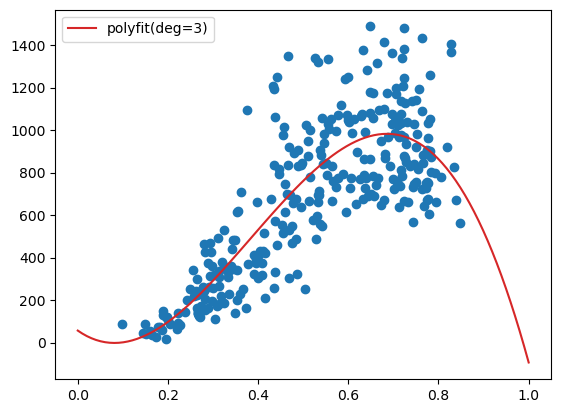

In [51]:
# (C) Plot the polynomial
# Generate a hundred x values between 0 and 1
x_values = np.linspace(0, 1, num=100)

# Predict y values with new coefs
y_values = poly.polyval(x_values, coefs)

# Plot the line
plt.scatter(x, y)  # Plot the actual data
plt.plot(x_values, y_values, c="C3", label='polyfit(deg=' +str(d)+ ')')  # Plot the prediction line
plt.legend()
plt.show()

Exercise: Evaluate your model
---

The RSS measure depends on the total number of data points since we sum the squared error over all data points. In practice, we prefer to have a measure that is independent of the number of observations. To achieve this, we can replace the sum by a mean, and we obtain the Mean Squared Error (MSE) measure.

$$
\text{MSE}=\frac{1}{n}\sum_{i=1}^{n}\left(y_{i}-\hat{y}_{i}\right)^{2}
$$

> **Exercise**: Implement the MSE measure.

In [52]:
def MSE(y, y_pred):
    return (np.sum(np.square(y - y_pred)))/len(y)

MSE can still be a large number since we measure squared errors. One solution is to take the square root of MSE to obtain the Root Mean Squared Error (RMSE).

$$
\text{RMSE}=\sqrt{\text{MSE}}
$$

> **Exercise**: Compute the estimated values `y_pred` for the data points `x`. Print the RMSE score.

In [53]:
def RMSE(y, y_pred):
    return  np.sqrt(MSE(y, y_pred))

In [54]:
# Predict y values with new coefs
y_pred = poly.polyval(x, coefs)
RMSE(y, y_pred)

207.95941528716372